<a href="https://colab.research.google.com/github/NerconX/finetuning-senior-project-/blob/main/Senior_Project_ChatBot_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q -U trl transformers accelerate git+https://github.com/huggingface/peft.git

!pip install -q datasets bitsandbytes einops wandb

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.9/100.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Import the necessary library for loading datasets
from datasets import load_dataset

# Specify the name of the dataset
dataset_name = "timdettmers/openassistant-guanaco"

# Load the dataset from the specified name and select the "train" split
dataset = load_dataset(dataset_name, split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
# Importing the required libraries
import torch

from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from transformers import FalconForCausalLM

# Defining the name of the Falcon model
model_name = "ybelkada/falcon-7b-sharded-bf16"

# Configuring the BitsAndBytes quantization
bnb_config = BitsAndBytesConfig(
load_in_4bit=True,
bnb_4bit_quant_type="nf4",
bnb_4bit_compute_dtype=torch.float16,
)

# Loading the Falcon model with quantization configuration
model = AutoModelForCausalLM.from_pretrained(
model_name,
quantization_config=bnb_config,
trust_remote_code=True
)

# Disabling cache usage in the model configuration
model.config.use_cache = False

config.json:   0%|          | 0.00/581 [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00008.bin:   0%|          | 0.00/1.92G [00:00<?, ?B/s]

pytorch_model-00002-of-00008.bin:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

pytorch_model-00003-of-00008.bin:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

pytorch_model-00004-of-00008.bin:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

pytorch_model-00005-of-00008.bin:   0%|          | 0.00/1.99G [00:00<?, ?B/s]

pytorch_model-00006-of-00008.bin:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

pytorch_model-00007-of-00008.bin:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

pytorch_model-00008-of-00008.bin:   0%|          | 0.00/921M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [ ]:
# Load the tokenizer for the Falcon 7B model with remote code trust
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

# Set the padding token to be the same as the end-of-sequence token
tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

In [ ]:
# Import the necessary module for LoRA configuration
from peft import LoraConfig

# Define the parameters for LoRA configuration
lora_alpha = 16
lora_dropout = 0.1
lora_r = 64

# Create the LoRA configuration object
peft_config = LoraConfig(
lora_alpha=lora_alpha,
lora_dropout=lora_dropout,
r=lora_r,
bias="none",
task_type="CAUSAL_LM",
  target_modules=[
  "query_key_value",
  "dense",
  "dense_h_to_4h",
  "dense_4h_to_h",
  ]
)

In [ ]:
from transformers import TrainingArguments
# Define the directory to save training results
output_dir = "./results"

# Set the batch size per device during training
per_device_train_batch_size = 2

# Number of steps to accumulate gradients before updating the model
gradient_accumulation_steps = 8

# Choose the optimizer type (e.g., "paged_adamw_32bit")
optim = "paged_adamw_32bit"

# Interval to save model checkpoints (every 10 steps)
save_steps = 10

# Interval to log training metrics (every 10 steps)
logging_steps = 10

# Learning rate for optimization
learning_rate = 2e-4

# Maximum gradient norm for gradient clipping
max_grad_norm = 0.3

# Maximum number of training steps
max_steps = 50

# Warmup ratio for learning rate scheduling
warmup_ratio = 0.03

# Type of learning rate scheduler (e.g., "constant")
lr_scheduler_type = "constant"

# Create a TrainingArguments object to configure the training process
training_arguments = TrainingArguments(
  output_dir=output_dir,
  per_device_train_batch_size=per_device_train_batch_size,
  gradient_accumulation_steps=gradient_accumulation_steps,
  optim=optim,
  save_steps=save_steps,
  logging_steps=logging_steps,
  learning_rate=learning_rate,
  fp16=True,  # Use mixed precision training (16-bit)
  max_grad_norm=max_grad_norm,
  max_steps=max_steps,
  warmup_ratio=warmup_ratio,
  group_by_length=True,
  lr_scheduler_type=lr_scheduler_type,
)

In [ ]:
# Import the SFTTrainer from the TRL library
from trl import SFTTrainer

# Set the maximum sequence length
max_seq_length = 512

# Create a trainer instance using SFTTrainer
trainer = SFTTrainer(
  model=model,
  train_dataset=dataset,
  peft_config=peft_config,
  dataset_text_field="text",
  max_seq_length=max_seq_length,
  tokenizer=tokenizer,
  args=training_arguments,
)

/usr/local/lib/python3.10/dist-packages/trl/trainer/ppo_config.py:141: UserWarning: The `optimize_cuda_cache` arguement will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(


Map:   0%|          | 0/9846 [00:00<?, ? examples/s]

In [ ]:
# Iterate through the named modules of the trainer's model
for name, module in trainer.model.named_modules():

# Check if the name contains "norm"
  if "norm" in name:
	  # Convert the module to use torch.float32 data type
	  module = module.to(torch.float32)

trainer.train()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
The current implementation of Falcon calls `torch.scaled_dot_product_attention` directly, this will be deprecated in the future in favor of the `BetterTransformer` API. Please install the latest optimum library with `pip install -U optimum` and call `model.to_bettertransformer()` to benefit from `torch.scaled_dot_product_attention` and future performance optimizations.


Step,Training Loss
10,1.321200
20,1.254100
30,1.342100
40,1.533200
50,1.774000


TrainOutput(global_step=50, training_loss=1.4449118614196776, metrics={'train_runtime': 190.5007, 'train_samples_per_second': 4.199, 'train_steps_per_second': 0.262, 'total_flos': 1.082204120854272e+16, 'train_loss': 1.4449118614196776, 'epoch': 0.08})

In [ ]:
from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer, TrainingArguments, Trainer
from transformers.data.data_collator import DataCollatorForLanguageModeling
import matplotlib.pyplot as plt
from trl import SFTTrainer
from peft import prepare_model_for_int8_training, LoraConfig, get_peft_model

# Load the dataset and create a validation split
dataset_name = "timdettmers/openassistant-guanaco"
dataset = load_dataset(dataset_name, split="train")
train_dataset, eval_dataset = dataset.train_test_split(test_size=0.1).values()

# Map the datasets to process the text
train_dataset = train_dataset.map(lambda examples: tokenizer(examples["text"], truncation=True, padding="max_length"), batched=True)
eval_dataset = eval_dataset.map(lambda examples: tokenizer(examples["text"], truncation=True, padding="max_length"), batched=True)

# Define the name of the model and tokenizer
model_name = "ybelkada/falcon-7b-sharded-bf16"
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

# Define and load the model with specific configurations
model = AutoModelForCausalLM.from_pretrained(model_name, load_in_8bit=True)
model = prepare_model_for_int8_training(model)

# Set the padding token to be the same as the end-of-sequence token
tokenizer.pad_token = tokenizer.eos_token

# Create the LoRA configuration object
lora_alpha = 16
lora_dropout = 0.1
lora_r = 64
peft_config = LoraConfig(
    lora_alpha=lora_alpha,
    lora_dropout=lora_dropout,
    r=lora_r,
    bias="none",
    task_type="CAUSAL_LM",
    target_modules=[
        "query_key_value",
        "dense",
        "dense_h_to_4h",
        "dense_4h_to_h",
    ]
)
model = get_peft_model(model, peft_config)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=8,
    save_steps=10,
    logging_steps=10,
    learning_rate=2e-4,
    fp16=True,
    max_grad_norm=0.3,
    num_train_epochs=1,  # Train for 1 epochs
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
)

# Disabling cache usage in the model configuration
model.config.use_cache = False

# Create a Trainer instance with the dataset_text_field parameter
trainer = SFTTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=DataCollatorForLanguageModeling(tokenizer, mlm=False),
    dataset_text_field="text"  # Assuming 'text' is the field in your dataset containing the text
)


# Train the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/peft/utils/other.py:136: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:194: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(
You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Epoch,Training Loss,Validation Loss
0,1.312500,1.240329


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain 

TrainOutput(global_step=553, training_loss=1.3228551022182968, metrics={'train_runtime': 7686.7137, 'train_samples_per_second': 1.153, 'train_steps_per_second': 0.072, 'total_flos': 2.0489472434289408e+17, 'train_loss': 1.3228551022182968, 'epoch': 1.0})

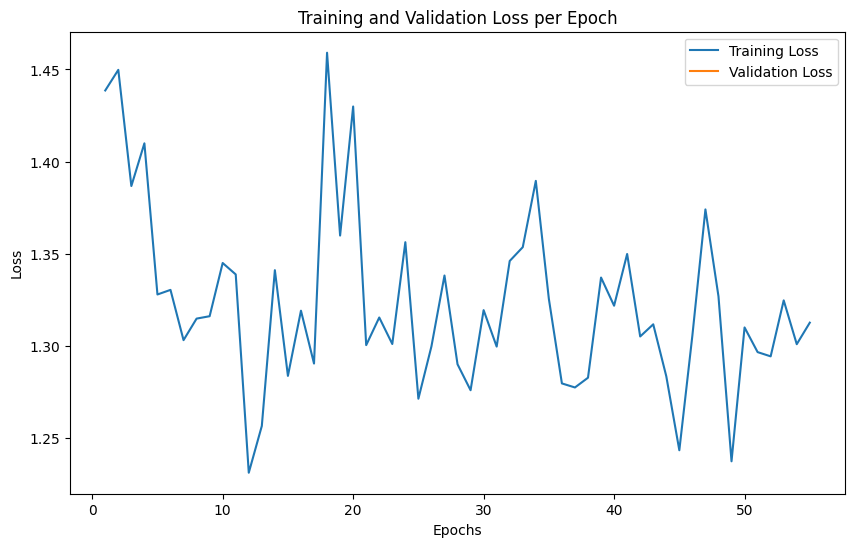

In [ ]:

# After training, extract and plot the training and validation losses
training_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
validation_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# Number of epochs should match the longer of the two lists
num_epochs = max(len(training_loss), len(validation_loss))
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 6))

# Plot Training Loss if available
if training_loss:
    plt.plot(epochs[:len(training_loss)], training_loss, label='Training Loss')

# Plot Validation Loss if available
if validation_loss:
    plt.plot(epochs[:len(validation_loss)], validation_loss, label='Validation Loss')

plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
def generate_response(prompt, max_length=50):
    """
    Generate a response from the model based on the given prompt.

    Args:
    - prompt (str): The input text prompt.
    - max_length (int): The maximum length of the generated sequence.

    Returns:
    - str: The generated response.
    """
    # Encode the prompt text
    input_ids = tokenizer.encode(prompt, return_tensors='pt')


    # Generate a response
    output = model.generate(input_ids, max_length=max_length, pad_token_id=tokenizer.eos_token_id)

    # Decode and return the generated text
    return tokenizer.decode(output[0], skip_special_tokens=True)


In [ ]:
prompt = "What is the capital of France?"
response = generate_response(prompt)
print(response)

TypeError: ignored

In [ ]:
prompt2 = "Can you write a short introduction about the relevance of the term monopsony in economics? "
response = generate_response(prompt2)
print(response)


In [ ]:
prompt3 = "Listened to Dvorak's The New World symphony, liked it much. What composers, not necessarily from Dvorak's time, wrote similar music?  "
response = generate_response(prompt3)
print(response)


In [ ]:
prompt4 = "Why is the skyblue?"
response = generate_response(prompt4)
print(response)